In [1]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

/home/btech/nityanand.mathur/anaconda3/envs/inpainting/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/btech/nityanand.mathur/anaconda3/envs/inpainting/lib/python3.11/site-packages/diffusers/pipelines/pipeline_utils.py:263: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:01,  3.53it/s]/home/btech/nityanand.mathur/anaconda3/envs/inpainting/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.p

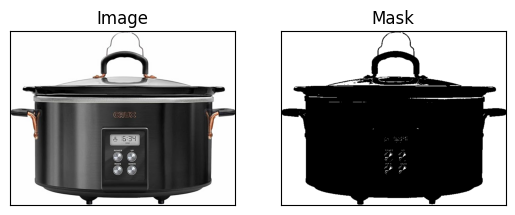

100%|██████████| 50/50 [01:20<00:00,  1.61s/it]


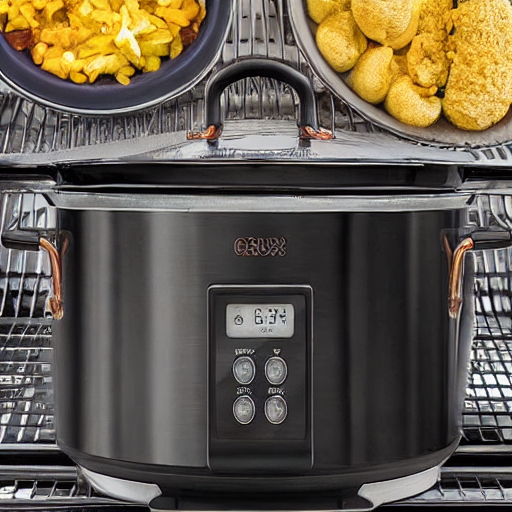

In [2]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float32
)

# Define a white threshold
lower = np.array([220, 220, 220])
upper = np.array([255, 255, 255])

image = Image.open("/home/btech/nityanand.mathur/Inpainting/data/examples/example1.jpg")

image_cv2 = np.array(image)
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2BGR)

mask = cv2.inRange(image_cv2, lower, upper)
mask = Image.fromarray(mask)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title("Image")
ax[0].set_xticks([])  # remove x-axis labels
ax[0].set_yticks([])  # remove y-axis labels
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Mask")
ax[1].set_xticks([])  # remove x-axis labels
ax[1].set_yticks([])  # remove y-axis labels
# plt.savefig("combined.png")
plt.show()

prompt = "Product in a kitchen used in meal preparation"

image = pipe(prompt=prompt, image=image, mask_image=mask).images[0]
display(image)
# image.save("./yellow_cat_on_park_bench.png")
